# Carrington sunmap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import sunpy.map
import sunpy.sun
from sunpy.coordinates import get_body_heliographic_stonyhurst

from module import readFitsBz2

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from module import toSunpyMap

map = toSunpyMap('carrington_test_data/imoa_06563_l1_20240306_08490557_emi1.fts.bz2')

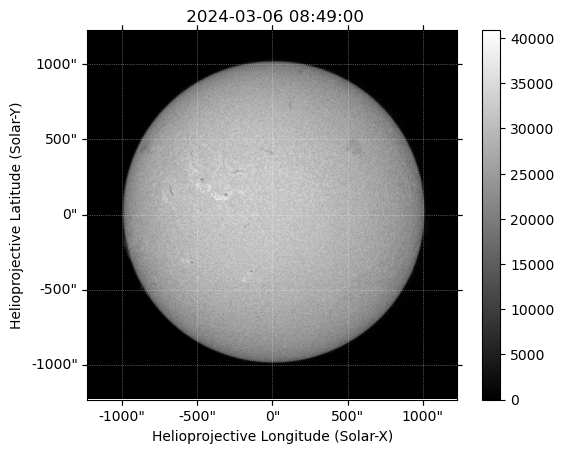

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection=map)
im = map.plot(axes=ax)
plt.colorbar(im, ax=ax);

In [4]:
map2 = toSunpyMap('carrington_test_data/imoa_06563_l1_20240315_09330607_emi1.fts.bz2')

In [5]:
maps = sunpy.map.Map([map, map2])


In [6]:
maps[0].meta['rsun_ref'] = sunpy.sun.constants.radius.to_value(u.m)

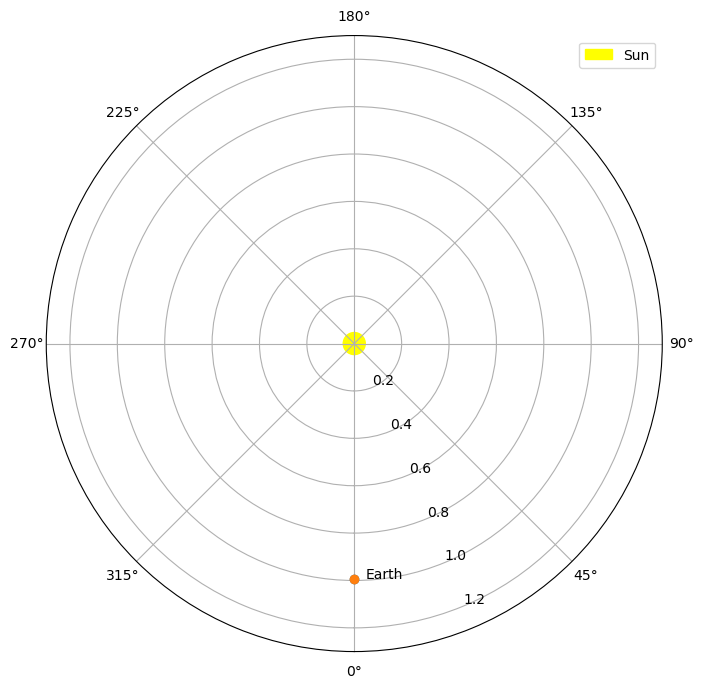

In [7]:
earth = get_body_heliographic_stonyhurst('earth', maps[0].date)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='polar')
circle = plt.Circle((0.0, 0.0), (10*u.Rsun).to_value(u.AU),
                    transform=ax.transProjectionAffine + ax.transAxes, color="yellow",
                    alpha=1, label="Sun")
ax.add_artist(circle)
ax.text(earth.lon.to_value("rad")+0.05, earth.radius.to_value(u.AU), "Earth")

for this_satellite, this_coord in [(m.observatory, m.observer_coordinate) for m in maps]:
    ax.plot(this_coord.lon.to('rad'), this_coord.radius.to(u.AU), 'o', label=this_satellite)

ax.set_theta_zero_location("S")
ax.set_rlim(0, 1.3)
ax.legend()

plt.show()

In [8]:
shape_out = (180, 360)  # This is set deliberately low to reduce memory consumption
header = sunpy.map.make_fitswcs_header(shape_out,
                                       SkyCoord(0, 0, unit=u.deg,
                                                frame="heliographic_stonyhurst",
                                                obstime=maps[0].date),
                                       scale=[360 / shape_out[1],
                                              180 / shape_out[0]] * u.deg / u.pix,
                                       projection_code="CAR")
out_wcs = WCS(header)

In [9]:
array, footprint = reproject_and_coadd(maps, out_wcs, shape_out,
                                       reproject_function=reproject_interp)

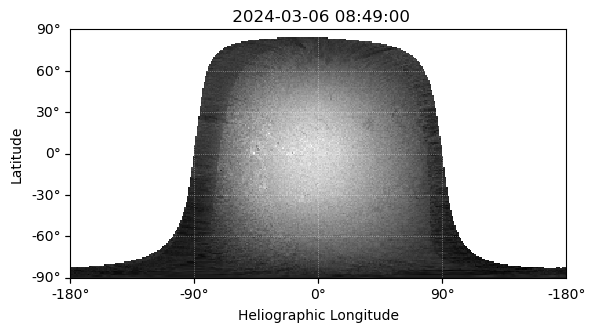

In [10]:
outmap = sunpy.map.Map((array, header))
outmap.plot_settings = maps[0].plot_settings

fig = plt.figure()
ax = fig.add_subplot(projection=outmap)
outmap.plot(axes=ax)

plt.show()

In [14]:
maps

 SunPy Map
 ---------
 Observatory:		 
 Instrument:		 
 Detector:		 
 Measurement:		 Unknown
 Wavelength:		 Unknown
 Observation Date:	 2024-03-06 08:49:00
 Exposure Time:		 Unknown
 Dimension:		 [2048. 2048.] pix
 Coordinate System:	 helioprojective
 Scale:			 [1.2 1.2] arcsec / pix
 Reference Pixel:	 [1024. 1024.] pix
 Reference Coord:	 [0. 0.] arcsec                   
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 SunPy Map
 ---------
 Observatory:		 
 Instrument:		 
 Detector:		 
 Measurement:		 Unknown
 Wavelength:		 Unknown
 Observation Date:	 2024-03-15 09:33:00
 Exposure Time:		 Unknown
 Dimension:		 [2048. 2048.] pix
 Coordinate System:	 helioprojective
 Scale:			 [1.2 1.2] arcsec / pix
 Reference Pixel:	 [1024. 1024.] pix
 Reference Coord:	 [0. 0.] arcsec                   
 array([[0, 0, 0, ..., 